Linear Algebra

In this section, we are going to learn about vector and matrix representation as well as their operations.

### 1.1 Vector, its Length and Direction

First, define your vector with positive value in both axes and plot it using the following code. Then, compute the vector magnitude/length and direction using the following equation:

$|v| = \sqrt[2]{v_1^{2} + v_2^{2}}$ 

$deg = tan^{-1}(v_2/v_1)$

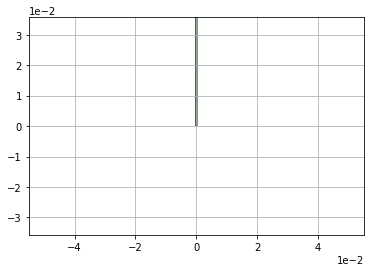

The vector length is:  5.0
The vector direction (inverse tangent) is = 90.0 degree.


In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

# TODO: By using numpy array, please define your vector.
v = 

# and we'll use a quiver plot to visualize it.
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(origin[0], origin[1], v[0], v[1], scale=10, color='r')
# plt.quiver(*origin, *v, scale=10, color='r') # Short version
plt.show()

# TODO: Compute the vector length
vMag = 
print('The vector length is: ', vMag)

# TODO: Compute the vector direction
vTan = 
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('The vector direction (inverse tangent) is = ' + str(math.degrees(vAtan)) + ' degree.')

### 1.2 Vector and Matrix Operation

We are going to experiment with different vector/matrix operation.

#### 1.2.1 Scalar Multiplication

Given the vector you define in the previous section, multiply your vector with a scalar number (e.g, 2, 3), and re-compute again the vector length/magnitude.

**Question**:
*   What happen when you multiply with a negative scalar number? 

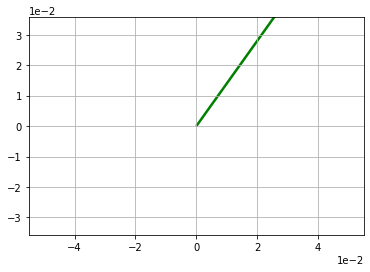

The vector length is:  25.80697580112788


In [31]:
# TODO: By using numpy array, please re-define your vector.
v = 

# TODO: Multiply your previous vector with a scalar number
v = 

# and we'll use a quiver plot to visualize it.
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *v, scale=10, color='r')
plt.show()

# TODO: Compute the vector length
vMag = 
print('The vector length is: ', vMag)

#### 1.2.2 Addition, Substraction, and Transpose

Implement matrix addition and substraction.

In [ ]:
import numpy as np

# TODO: Implement matrix addition and substraction here:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,5,4],
              [3,2,1]])
print() # additzion
print() # substraction

Now implement matrix transpose.

In [44]:
import numpy as np

A = np.array([[1,2,3],
              [4,5,6]])
# TODO: Implement the transpose of the above matrix
print(z)

Baris dan Kolom, 2 dan 3
Bentuk matrix baru
[[0 0]
 [0 0]
 [0 0]]
Tanpa library NumPy :
[[1 4]
 [2 5]
 [3 6]]
Dengan library NumPy :
[[1 4]
 [2 5]
 [3 6]]


#### 1.2.3 Dot Product

Implement dot product between 2 vector by using numpy library.

In [ ]:
import numpy as np

# TODO: Implement vector dot product using numpy
v = np.array([2,1])
s = np.array([-3,2])
d = 
print('The dot product between vector v and s is: ', d)

Another way to perform dot product without numpy is by using operator @.

In [ ]:
import numpy as np

# TODO: Implement vector dot product using @ operator.
v = np.array([2,1])
s = np.array([-3,2])
d = 
print('The dot product between vector v and s is: ', d)

Now, do exactly the same but with matrix. Please define your own matrix with numpy array.

In [ ]:
import numpy as np

# TODO: Implement matrix dot product
A = 
B = 
print() # using np.dot
print() # using @

Let's try to perform a dot product with identity matrix.


In [ ]:
import numpy as np

# TODO: Implement matrix dot product
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B =  # Identity matrix here
print()

#### 1.2.4 Cross Product

Implement cross product using numpy library.

In [2]:
import numpy as np

# TODO: Implement cross dot product using numpy
p = np.array([2,3,1])
q = np.array([1,2,-2])
r = 
print('The dot product between vector v and s is: ', r)

SyntaxError: invalid syntax (<ipython-input-2-74a5b0b25b71>, line 6)

### 1.3 Inverse Matrix

Implement the inverse of the following matrix using numpy library (linalg.inv).

In [ ]:
import numpy as np

B = np.array([[6,2],
              [1,2]])

# TODO: Implement the inverse of the above array
print()

Now, try to multiply the inverse of a matrix with another matrix.

**Question**:
*   Is the order of multiplication important here? Does $A.B^{-1}$ generate the same result with $B^{-1}.A$?


In [ ]:
import numpy as np

A = np.array([[1,2],
              [3,4]])

B = np.array([[6,2],
              [1,2]])

# TODO: Multiply the inverse of B with A
C = 

print(C)

This is an example of how math equation in a paper is implemented in Python.

The equation is taken from Equations (8)-(10) in the following paper:

[Muhamad Risqi U. Saputra, et. al., "Distilling Knowledge From a Deep Pose Regressor Network", IEEE/CVF ICCV 2019.](https://openaccess.thecvf.com/content_ICCV_2019/papers/Saputra_Distilling_Knowledge_From_a_Deep_Pose_Regressor_Network_ICCV_2019_paper.pdf)

In [ ]:
from keras import backend as K
import tensorflow as tf

# Attentive loss for translation
def trans_AIL(y_true, y_pred):
    hard_label = y_true[:, :, 0:3]
    soft_label = y_true[:, :, 3:6]

    lower_bound = 0.52132207277 # inverse normalization factor (1/1.9182)=0.52132207277
    teacher_error_gt = K.square(soft_label - hard_label)
    soft_weight = tf.subtract(tf.ones_like(teacher_error_gt), tf.multiply(teacher_error_gt, lower_bound))

    hard_weight = 1
    hard_loss = K.square(y_pred - hard_label)
    soft_loss = K.square(y_pred - soft_label)

    L_final = K.mean(((hard_weight * hard_loss) + (soft_weight * soft_loss)),axis=-1)

    return L_final

# Attentive loss for rotation
def rot_AIL(y_true, y_pred):
    hard_label = y_true[:, :, 0:3]
    soft_label = y_true[:, :, 3:6]

    lower_bound = 0.22953679474 # inverse normalization factor (1/4.3566)=0.22953679474
    teacher_error_gt = K.square(soft_label - hard_label)
    soft_weight = tf.subtract(tf.ones_like(teacher_error_gt), tf.multiply(teacher_error_gt, lower_bound))

    hard_weight = 1
    hard_loss = K.square(y_pred - hard_label)
    soft_loss = K.square(y_pred - soft_label)

    L_final = K.mean(((hard_weight * hard_loss) + (soft_weight * soft_loss)), axis=-1)

    return L_final

This is another example taken from Equation (5) in the following paper:

[Muhamad Risqi U. Saputra, et. al., "DeepTIO: A Deep Thermal-Inertial Odometry with Visual Hallucination", IEEE RA-L 2020.](https://arxiv.org/pdf/1909.07231.pdf)

In [ ]:
from keras import backend as K
import tensorflow as tf

def huber_loss(y_true, y_pred, clip_delta=1.0):
  error = y_true - y_pred
  cond  = tf.keras.backend.abs(error) < clip_delta

  squared_loss = 0.5 * tf.keras.backend.square(error)
  linear_loss  = clip_delta * (tf.keras.backend.abs(error) - 0.5 * clip_delta)

  return tf.where(cond, squared_loss, linear_loss)

def huber_loss_mean(y_true, y_pred, clip_delta=1.0):
  return tf.keras.backend.mean(huber_loss(y_true, y_pred, clip_delta))

**Final task**: Please try to convert a math equation from your favorite paper into python! :)


---

